#Important Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [34]:
df = pd.read_csv('Loan Eligibility.csv')

In [35]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Explore Data in Depth

In [36]:
df.shape

(614, 13)

In [37]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [39]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [40]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [42]:
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})

In [43]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

In [44]:
df['Property_Area'] = df['Property_Area'].map({'Urban': 1, 'Rural': 3, 'Semiurban': 2})

In [45]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})

In [46]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [48]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,1,1
6,LP001013,1.0,1.0,0,0,0.0,2333,1516.0,95.0,360.0,1.0,1,1
7,LP001014,1.0,1.0,3+,1,0.0,3036,2504.0,158.0,360.0,0.0,2,0
8,LP001018,1.0,1.0,2,1,0.0,4006,1526.0,168.0,360.0,1.0,1,1
9,LP001020,1.0,1.0,1,1,0.0,12841,10968.0,349.0,360.0,1.0,2,0


In [49]:
df['ApplicantIncome'].head()

0    5849
1    4583
2    3000
3    2583
4    6000
Name: ApplicantIncome, dtype: int64

In [50]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1,1
613,LP002990,0.0,0.0,0,1,1.0,4583,0.0,133.0,360.0,0.0,2,0


In [51]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,0.0,1.0,1,1,0.0,12000,0.0,496.0,360.0,1.0,2,1
605,LP002960,1.0,1.0,0,0,0.0,2400,3800.0,NaN,180.0,1.0,1,0
606,LP002961,1.0,1.0,1,1,0.0,3400,2500.0,173.0,360.0,1.0,2,1
607,LP002964,1.0,1.0,2,0,0.0,3987,1411.0,157.0,360.0,1.0,3,1
608,LP002974,1.0,1.0,0,1,0.0,3232,1950.0,108.0,360.0,1.0,3,1
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1,1
613,LP002990,0.0,0.0,0,1,1.0,4583,0.0,133.0,360.0,0.0,2,0


In [52]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
148,LP001519,0.0,0.0,0,1,0.0,10000,1666.0,225.0,360.0,1.0,3,0


In [53]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
302,LP001974,0.0,0.0,0,1,0.0,5000,0.0,132.0,360.0,1.0,3,1
320,LP002051,1.0,1.0,0,1,0.0,2400,2167.0,115.0,360.0,1.0,2,1
344,LP002128,1.0,1.0,2,1,NaN,2583,2330.0,125.0,360.0,1.0,3,1
41,LP001120,1.0,0.0,0,1,0.0,1800,1213.0,47.0,360.0,1.0,1,1
201,LP001677,1.0,0.0,2,1,0.0,4923,0.0,166.0,360.0,0.0,2,1


In [54]:
df[10:20]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
10,LP001024,1.0,1.0,2,1,0.0,3200,700.0,70.0,360.0,1.0,1,1
11,LP001027,1.0,1.0,2,1,NaN,2500,1840.0,109.0,360.0,1.0,1,1
12,LP001028,1.0,1.0,2,1,0.0,3073,8106.0,200.0,360.0,1.0,1,1
13,LP001029,1.0,0.0,0,1,0.0,1853,2840.0,114.0,360.0,1.0,3,0
14,LP001030,1.0,1.0,2,1,0.0,1299,1086.0,17.0,120.0,1.0,1,1
15,LP001032,1.0,0.0,0,1,0.0,4950,0.0,125.0,360.0,1.0,1,1
16,LP001034,1.0,0.0,1,0,0.0,3596,0.0,100.0,240.0,NaN,1,1
17,LP001036,0.0,0.0,0,1,0.0,3510,0.0,76.0,360.0,0.0,1,0
18,LP001038,1.0,1.0,0,0,0.0,4887,0.0,133.0,360.0,1.0,3,0
19,LP001041,1.0,1.0,0,1,NaN,2600,3500.0,115.0,NaN,1.0,1,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 62.5+ KB


In [56]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.962541,0.687296
std,0.389718,0.476920,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000,1.000000


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,601.0,0.813644,0.389718,0.0,1.0,1.0,1.00,1.0
Married,611.0,0.651391,0.476920,0.0,0.0,1.0,1.00,1.0
Education,614.0,0.781759,0.413389,0.0,1.0,1.0,1.00,1.0
Self_Employed,582.0,0.140893,0.348211,0.0,0.0,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Property_Area,614.0,1.962541,0.787482,1.0,1.0,2.0,3.00,3.0


In [58]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [59]:
df.groupby('Loan_Status').size()

Loan_Status
0    192
1    422
dtype: int64

# Visualization of Data

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Self_Employed'}>,
        <Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>,
        <Axes: title={'center': 'Credit_History'}>],
       [<Axes: title={'center': 'Property_Area'}>,
        <Axes: title={'center': 'Loan_Status'}>, <Axes: >]], dtype=object)

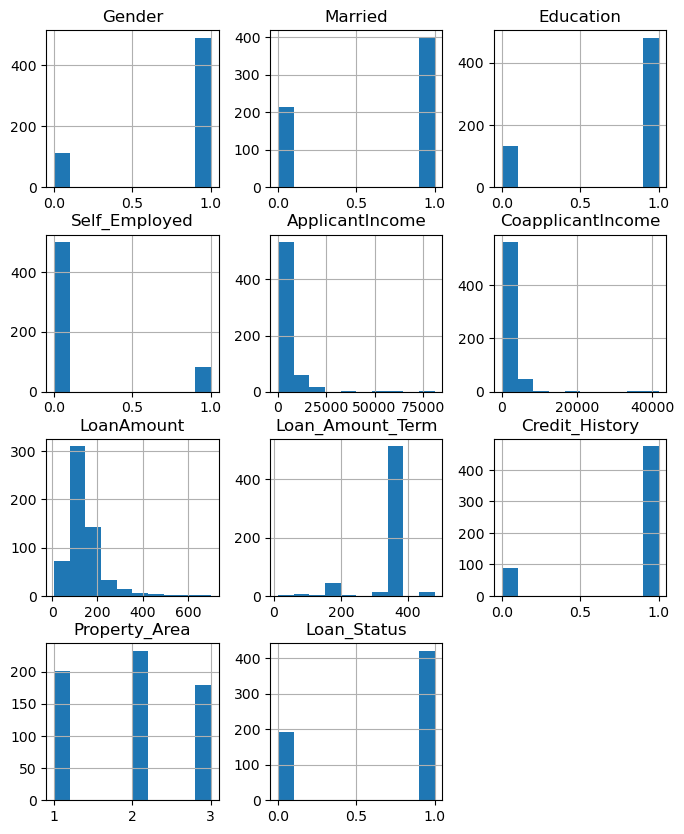

In [405]:
df.hist(figsize = (8,10))

In [ ]:
sn.pairplot(df, hue = 'Loan_Status')

In [ ]:
df.corr()

In [ ]:
sn.heatmap(df.corr())

In [ ]:
sn.countplot(x='Loan_Status',data=df)
plt.show()

In [ ]:
sn.boxplot(x='ApplicantIncome',data=df)
plt.show()

In [ ]:
sn.scatterplot(x='ApplicantIncome', y='CoapplicantIncome',data=df)
plt.show()

In [ ]:
sn.distplot(df['ApplicantIncome'])

In [ ]:
sn.jointplot(x='ApplicantIncome',y='CoapplicantIncome',data=df)

In [ ]:
sn.kdeplot(df['ApplicantIncome'])

# Data Cleaning

In [60]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [61]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = df['Dependents'].astype(float)

In [62]:
df.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,1
6,LP001013,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,1,1
7,LP001014,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,2,0
8,LP001018,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,1,1
9,LP001020,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,2,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


In [64]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.962541,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000,1.000000


Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

#Glucose
#BloodPressure
#SkinThickness
#Insulin
#BMI

In [65]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1


In [66]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


In [68]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.962541,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000,1.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


In [70]:
df = df.drop('Loan_ID', axis=1)

In [71]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1


In [72]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0], inplace = True)

In [73]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [74]:
df['Gender'].fillna(df['Gender'].mode().iloc[0], inplace = True)

In [75]:
df['Married'].fillna(df['Married'].mode().iloc[0], inplace = True)

In [76]:
df['Dependents'].fillna(df['Dependents'].mode().iloc[0], inplace = True)

In [77]:
df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0], inplace = True)

In [78]:
df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0], inplace = True)

In [79]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.7 KB


In [81]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,1,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,3,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,3,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,1,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,1,1


If there is a dataset that have great outliers,
I'll prefer median.
E.x.: 99% of household income is below 100, and 1% is above 500.

On the other hand,
if we work with wear of clothes that customers give to dry-cleaner
(assuming that dry-cleaners' operators fill this field intuitively),
I'll fill missings with mean value of wear.

# Scaling the data
#Outlier!!! The Silent Killer

In [82]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

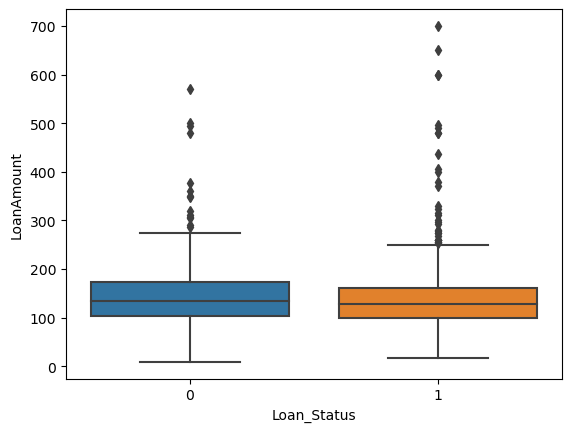

In [83]:
sn.boxplot(x='Loan_Status', y='LoanAmount',data=df)
plt.show()

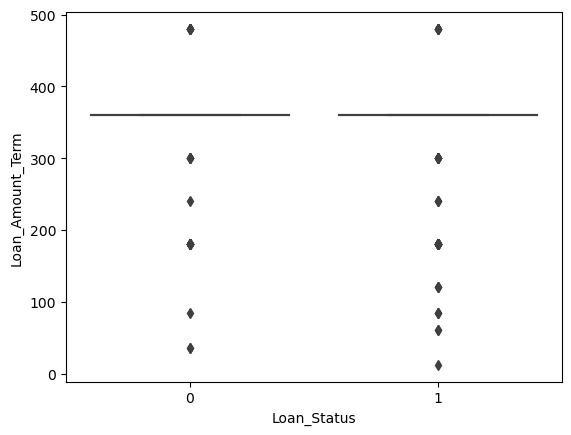

In [84]:
sn.boxplot(x='Loan_Status', y='Loan_Amount_Term',data=df)
df['Loan_Amount_Term'].max()
plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.7 KB


# Decide Dependant and Independant Elements in Data Set

In [86]:
x=df.drop('Loan_Status',axis=1)

In [87]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,3
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,3
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,3
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,1


In [88]:
y=df['Loan_Status']

In [89]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

#Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 379 to 268
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             429 non-null    float64
 1   Married            429 non-null    float64
 2   Dependents         429 non-null    float64
 3   Education          429 non-null    int64  
 4   Self_Employed      429 non-null    float64
 5   ApplicantIncome    429 non-null    int64  
 6   CoapplicantIncome  429 non-null    float64
 7   LoanAmount         429 non-null    float64
 8   Loan_Amount_Term   429 non-null    float64
 9   Credit_History     429 non-null    float64
 10  Property_Area      429 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 40.2 KB


In [93]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 550 to 56
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             185 non-null    float64
 1   Married            185 non-null    float64
 2   Dependents         185 non-null    float64
 3   Education          185 non-null    int64  
 4   Self_Employed      185 non-null    float64
 5   ApplicantIncome    185 non-null    int64  
 6   CoapplicantIncome  185 non-null    float64
 7   LoanAmount         185 non-null    float64
 8   Loan_Amount_Term   185 non-null    float64
 9   Credit_History     185 non-null    float64
 10  Property_Area      185 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 17.3 KB


#Machine Learning Models

1. Linear
2. Logistic
3. SVC
4. KNN
5. K Mean
6. Desicion Tree
7. Random Forest
8. Naive Bayes

#Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
logmodel = LogisticRegression()

In [96]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [97]:
predictions = logmodel.predict(X_test)

In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        65
           1       0.75      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.83      0.70      0.71       185
weighted avg       0.81      0.78      0.75       185



In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
print(confusion_matrix(y_test,predictions))

[[ 27  38]
 [  3 117]]


#SMV

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM = SVC()

In [ ]:
SVM.fit(X_train,y_train)

In [ ]:
predictions = SVM.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

#K Mean

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Kmean = KMeans(n_clusters=2)

In [ ]:
Kmean.fit(X_train,y_train)

In [ ]:
predictions = Kmean.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
 NB= GaussianNB()

In [ ]:
NB.fit(X_train,y_train)

In [ ]:
predictions = NB.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

# cannot apply Linear Regression to this Data

#Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
LDA.fit(X_train,y_train)

In [ ]:
predictions = LDA.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))